In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split 
from collections import defaultdict




In [2]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
mileage_p = df[['Price', 'Mileage']]
func_one = lambda x: 0 + .5 * x


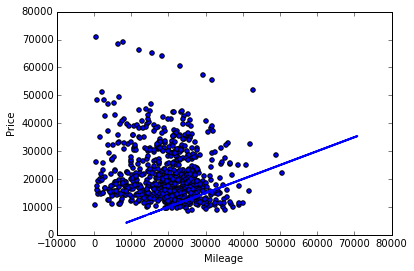

In [6]:
plt.scatter(mileage_p['Mileage'], mileage_p['Price'])
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.plot(mileage_p.Price, func_one(mileage_p.Price), linewidth=2)

plt.show()

In [7]:
dfa = mileage_p.loc[:, ['Price', 'Mileage']]
dfa.dropna(inplace=True)
price = dfa[['Price']]
mile = dfa['Mileage']

In [8]:
regrp = linear_model.LinearRegression()
regrp.fit(price, mile)
print("Coeficient: {}".format(regrp.coef_))
print(regrp.score(price, mile))



Coeficient: [-0.11861458]
0.0204634473235


###This equation is not a good fit for the data


In [9]:
a = regrp.coef_[0]
func_two = lambda x: 0 + a * x


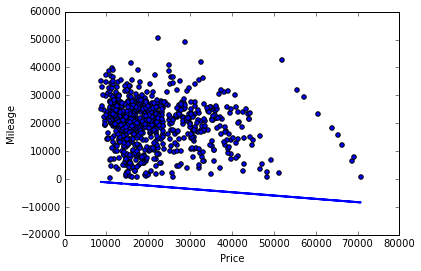

In [10]:
plt.scatter(mileage_p['Price'], mileage_p['Mileage'])
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.plot(mileage_p.Price, func_two(mileage_p.Price), linewidth=2)

plt.show()

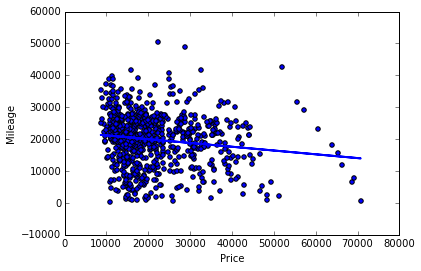

In [11]:
plt.scatter(price, mile)
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.plot(price, regrp.predict(price), linewidth=2)

plt.show()

##Start of Part 2:


Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [12]:
set_one = df
set_one.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [13]:
set_one = set_one[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
set_one.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,6,3.1,4,1,1,1
1,17542.036083,9135,6,3.1,4,1,1,0
2,16218.847862,13196,6,3.1,4,1,1,0
3,16336.913140,16342,6,3.1,4,1,0,0
4,16339.170324,19832,6,3.1,4,1,0,1


In [14]:
input_data = set_one[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
predict_value = set_one['Price']

In [15]:
regrt = linear_model.LinearRegression()
regrt.fit(input_data, predict_value)
print('Coeficient: {}'.format(regrt.coef_))
print(regrt.score(input_data, predict_value))

Coeficient: [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
0.446264353673


###This data set only has a 44% accuracy at predicting car price.  Which sucks, but much better than just mileage

In [16]:
new_input = input_data[['Mileage', 'Doors', 'Sound']]

newreg = linear_model.LinearRegression()
newreg.fit(new_input, predict_value)
print('Coeficient: {}'.format(newreg.coef_))
print(newreg.score(new_input, predict_value))

Coeficient: [ -1.79922895e-01  -1.74267951e+03  -2.91228419e+03]
0.0592505439204


In [17]:
new_i = input_data[['Cylinder']]

newr = linear_model.LinearRegression()
newr.fit(new_i, predict_value)
print('Coeficient: {}'.format(newr.coef_))
print(newr.score(new_i, predict_value))

Coeficient: [ 4054.20250438]
0.323859037595


####The number of cylinders is the most import feature of the car to predict price, although it is still only accurate 32% of the time by its self. 

##Now time to try automating important variables


In [18]:
import itertools

dependant_variables = list(set_one.columns)
dependant_variables.remove('Price')



In [19]:
choices = []

def combos(list_of_series):
    combos = []
    x = len(list_of_series) + 1
    for num in range(2,x):
        combos.append(list(itertools.combinations(list_of_series, num)))
        x -= 1
    return itertools.chain(*combos)

combos = combos(dependant_variables)
print(combos)

def regression_for(combo):
    combo = list(combo)
    df = set_one.loc[:, combo + ['Price']]
    df.dropna(inplace=True)
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)


for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
print('\n' + 50 * len(best) * '-' + '\n')
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)



(('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.4462643536728379)

----------------------------------------------------------------------------------------------------

[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03] 6758.7551436


##Based on the data set used in the previous example,  mileage, cylinders, liters, doors, cruise, sound, and leather still yields the most accurate prediction, 44.6%.  Next I will incorporate make, model, trim, and type into my data set and see what combination yields the most accurate result


In [20]:
def get_dict(groupby_obj):
    keys = []
    val = 1
    x = len(groupby_obj) + 1
    while val < x:
        for key in groupby_obj.groups:
            keys.append((key, val))
            val += 1
    return {el:v for el,v in keys}

In [21]:
set_two = df


car_type = set_two.sort('Type')
c_type = car_type.groupby('Type')

type_d = get_dict(c_type)
type_d

{'Convertible': 3, 'Coupe': 5, 'Hatchback': 1, 'Sedan': 4, 'Wagon': 2}

In [22]:
car_make = set_two.sort('Make')
car_make.groupby('Make').size()
make = car_make.groupby('Make')
make_d = get_dict(make)
make_d

{'Buick': 2,
 'Cadillac': 5,
 'Chevrolet': 6,
 'Pontiac': 4,
 'SAAB': 1,
 'Saturn': 3}

In [23]:

car_model = set_two.sort('Model')
model = car_model.groupby('Model')
model_d = get_dict(model)
model_d

{'9-2X AWD': 13,
 '9_3': 21,
 '9_3 HO': 30,
 '9_5': 8,
 '9_5 HO': 4,
 'AVEO': 19,
 'Bonneville': 32,
 'CST-V': 25,
 'CTS': 9,
 'Cavalier': 18,
 'Century': 7,
 'Classic': 11,
 'Cobalt': 27,
 'Corvette': 16,
 'Deville': 20,
 'G6': 14,
 'GTO': 28,
 'Grand Am': 31,
 'Grand Prix': 10,
 'Impala': 12,
 'Ion': 5,
 'L Series': 3,
 'Lacrosse': 15,
 'Lesabre': 2,
 'Malibu': 22,
 'Monte Carlo': 6,
 'Park Avenue': 29,
 'STS-V6': 23,
 'STS-V8': 26,
 'Sunfire': 1,
 'Vibe': 17,
 'XLR-V8': 24}

In [24]:
car_Trim = set_two.sort('Trim')
trim = car_Trim.groupby('Trim')
trim_d = get_dict(trim)
len(trim_d)

47

In [25]:
final_data = set_two.replace({'Type': type_d, 'Make': make_d, 'Model': model_d, 'Trim': trim_d
                           })


In [26]:
final_data = final_data.dropna()
final_data.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,3,3,45,4,6,3,4,1,0,0
800,16175.957604,19095,3,3,45,4,6,3,4,1,1,0
801,15731.132897,20484,3,3,45,4,6,3,4,1,1,0
802,15118.893228,25979,3,3,45,4,6,3,4,1,1,0
803,13585.636802,35662,3,3,45,4,6,3,4,1,0,0


In [27]:
final_data.head()


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,2,7,17,4,6,3.1,4,1,1,1
1,17542.036083,9135,2,7,17,4,6,3.1,4,1,1,0
2,16218.847862,13196,2,7,17,4,6,3.1,4,1,1,0
3,16336.913140,16342,2,7,17,4,6,3.1,4,1,0,0
4,16339.170324,19832,2,7,17,4,6,3.1,4,1,0,1


In [30]:

dependant_variable = list(final_data.columns)
dependant_variable.remove('Price')

type(final_data)
    
def combos(list_of_series):
    combos = []
    x = len(list_of_series) + 1
    for num in range(2,x):
        combos.append(list(itertools.combinations(list_of_series, num)))
        x -= 1
    return itertools.chain(*combos)

combos = combos(dependant_variable)

def regression_for(combo):
    combo = list(combo)
    df = final_data.loc[:, combo + ['Price']]
    df.dropna(inplace=True)
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)


for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]

print(best)
print('\n' + 50 * len(best) * '-' + '\n')
regr, score = regression_for(best[0])
#print(regr.coef_, regr.intercept_)



(('Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.62448899040747941)

----------------------------------------------------------------------------------------------------



In [31]:
print(list(best[0]))
#a_train, a_test, b_train, b_test = train_test_split(df, df.columns, test_size=0.33)

['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


#I have gotten my accuracy to 64.5% using these paramaters: 
## Mileage, Make, Model, Trim, Type, Cylinder, Liter, Doors, Cruise, Sound, Leather 

Make a function that iterates over all posiible splits of data frame 

<!----
final_data = final_data
def make_sets(df):
    train, test = train_test_split(df, df.columns, test_size=0.33)
    return train, test
#train, test = make_sets(final_data)

def combos(list_of_series):
    combos = []
    x = len(list_of_series) + 1
    for num in range(2,x):
        combos.append(list(itertools.combinations(list_of_series, num)))
        x -= 1
    return itertools.chain(*combos)



def regression_for(combo, param='Price', data_frame=final_data):
    combo = list(combo)
    df = data_frame.loc[:, combo + [param]]
    df.dropna(inplace=True)
    input_data = df[combo]
    price = df[param]
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)


def optimization(df, param='Price'):
    df = list(df.columns)
    df.remove(param)
    choices = []
    series = combos(df)
    for combo in series:
        regr, score = regression_for(combo)
        choices.append((combo, score))
    return choices



best = sorted(optimization(df), key=lambda x: x[1])[-1]



    
print('\n' + 50 * len(best) * '-' + '\n')

print(regr.coef_, regr.intercept_)
-->

In [35]:

choices = []
inal_data = final_data


def combos(list_of_series):
    combos = []
    x = len(list_of_series) + 1
    for num in range(2,x):
        combos.append(list(itertools.combinations(list_of_series, num)))
        x -= 1
    return itertools.chain(*combos)



def regression_for(combo, param='Price', data_frame=final_data):
    combo = list(combo)
    df = data_frame.loc[:, combo + [param]]
    df.dropna(inplace=True)
    input_data = df[combo]
    price = df[param]
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)


def optimization(df, param='Price'):
    df = list(df.columns)
    df.remove(param)
    choices = []
    series = combos(df)
    for combo in series:
        regr, score = regression_for(combo)
        choices.append((combo, score))
    return best
optimization(final_data)    
    

print(best)
print('\n' + 50 * len(best) * '-' + '\n')

print(regr.coef_, regr.intercept_)


(('Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.62448899040747941)

----------------------------------------------------------------------------------------------------

[ -1.78288796e-01  -2.30475011e+03   1.23586041e+02  -9.13140802e+01
  -2.20756434e+03   4.95954978e+03  -7.03194039e+02  -3.03269773e+03
   3.45680314e+03  -3.78689401e+02   3.39003845e+03] 24369.7163568
